# Standard Data Wrangling Commands

***Python, version 0.9***

Anton Antonov
[RakuForPrediction-book at GitHub](https://github.com/antononcube/RakuForPrediction-book)
[SimplifiedMachineLearningWorkflows-book at GitHub](https://github.com/antononcube/SimplifiedMachineLearningWorkflows-book)
September 2022


------

## Introduction

This document demonstrates and exemplifies the abilities of the Raku package
["DSL::English::DataQueryWorkflow"](https://raku.land/zef:antononcube/DSL::English::DataQueryWorkflows), [AAp1],
to produce executable Python code that fits majority of the data wrangling use cases.

The examples should give a good idea of the English-based Domain Specific Language (DSL) utilized by [AAp1].

The data wrangling in Python is done with the package ["pandas"](https://pandas.pydata.org).

This notebook has examples that were used in the presentation
["Multi-language Data-Wrangling Conversational Agent"](https://www.youtube.com/watch?v=pQk5jwoMSxs), [AAv1].
That presentation is an introduction to data wrangling from a more general, multi-language perspective.

*It is assumed that the readers of this notebook are familiar with the general data processing workflow discussed in the presentation [AAv1].*

For detailed introduction into data wrangling (with- and in Raku) see the article
["Introduction to data wrangling with Raku"](https://rakuforprediction.wordpress.com/2021/12/31/introduction-to-data-wrangling-with-raku/), [AA1].
(And its Bulgarian version [AA2].)

Some of the datasets are acquired with the package
["ExampleDatasets"](https://pypi.org/project/ExampleDatasets/).

The data wrangling sections have two parts: a code generation part, and an execution steps part.

### Generated code

- Jupyter notebooks allow the invocation of shell commands and the definition of command aliases. Both of these features are leveraged.
- The Raku package [AAp1] is utilized in this Jupyter notebook through package's Command Line Interface (CLI) script `ToDataQueryWorkflowCode`.
- Additionally, the CLI script `ToDataQueryWorkflowCode` allows its code results to be copied to the clipboard of the host Operating System (OS).


------

## Setup

### Load packages

In [4]:
Import["https://raw.githubusercontent.com/antononcube/MathematicaForPrediction/master/DataReshape.m"];
Import["https://raw.githubusercontent.com/antononcube/ConversationalAgents/master/Packages/WL/DSLMode.m"];

>> Importing from GitHub: ExternalParsersHookup.m
>> Importing from GitHub: RakuCommand.m
>> Importing from GitHub: MonadicContextualClassification.m
>> Importing from GitHub: MathematicaForPredictionUtilities.m
>> Importing from GitHub: MosaicPlot.m
>> Importing from GitHub: CrossTabulate.m


UpSetDelayed::write: Tag Association in MatrixPlot[x_Association /; KeyExistsQ[x, SparseMatrix] || KeyExistsQ[x, XTABTensor], opts___] is Protected.

UpSetDelayed::write: Tag Association in Transpose[x_Association /; KeyExistsQ[x, SparseMatrix] || KeyExistsQ[x, XTABTensor], args___] is Protected.

>> Importing from GitHub: ParetoPrincipleAdherence.m
>> Importing from GitHub: StateMonadCodeGenerator.m
>> Importing from GitHub: ClassifierEnsembles.m
>> Importing from GitHub: ROCFunctions.m
>> Importing from GitHub: VariableImportanceByClassifiers.m
>> Importing from GitHub: SSparseMatrix.m
>> Importing from GitHub: OutlierIdentifiers.m
>> Importing from GitHub: MonadicQuantileRegression.m
>> Importing from GitHub: QuantileRegression.m
>> Importing from GitHub: MonadicStructuralBreaksFinder.m
>> Importing from GitHub: MonadicLatentSemanticAnalysis.m
>> Importing from GitHub: DocumentTermMatrixConstruction.m
>> Importing from GitHub: NonNegativeMatrixFactorization.m
>> Importing from GitHub: IndependentComponentAnalysis.m
>> Importing from GitHub: MonadicSparseMatrixRecommender.m
>> Importing from GitHub: MonadicEpidemiologyCompartmentalModeling.m
>> Importing from GitHub: HextileBins.m
>> Importing from GitHub: TileBins.m
>> Importing from GitHub: EpidemiologyModels.m
>> Importing 

### Load data

In order to use file sources with *unverified* Secure Sockets Layer (SSL) we use this code:

#### Titanic data

We can obtain the Titanic dataset provided by project ["MathematicaVsR"](https://github.com/antononcube/MathematicaVsR):

In [6]:
dfTitanic = Import["https://raw.githubusercontent.com/antononcube/MathematicaVsR/master/Data/MathematicaVsR-Data-Titanic.csv", "Dataset", HeaderLines->1];
Dimensions[dfTitanic]

{1309, 5}

#### Anscombe's quartet

The dataset named
["Anscombe's quartet"](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
has four datasets that have nearly identical simple descriptive statistics,
yet have very different distributions and appear very different when graphed.

Anscombe's quartet is (usually) given in a table with eight columns that is somewhat awkward to work with.
Below we demonstrate data transformations that make plotting of the four datasets easier.
The DSL specifications used make those data transformations are programming language independent.

We can obtain the Anscombe's dataset using the function `example_dataset` provided by "ExampleDatasets", [AAp4]:

In [8]:
dfAnscombe = ResourceFunction["ExampleDataset"][{"Statistics", "AnscombeRegressionLines"}];
Dimensions[dfAnscombe]

{11, 8}

#### Star Wars films data

We can obtain [Star Wars films](https://en.wikipedia.org/wiki/List_of_Star_Wars_films) datasets using the `pandas` function `read_csv`:

In [10]:
dfStarwars = Import["https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwars.csv", "Dataset", HeaderLines->1];
dfStarwarsFilms = Import["https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsFilms.csv", "Dataset", HeaderLines->1];
dfStarwarsStarships = Import["https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsStarships.csv", "Dataset", HeaderLines->1];
dfStarwarsVehicles = Import["https://raw.githubusercontent.com/antononcube/R-packages/master/DataQueryWorkflowsTests/inst/extdata/dfStarwarsVehicles.csv", "Dataset", HeaderLines->1];

Here are the dimensions of the obtained data frames:

In [14]:
Map[ # -> Dimensions[ToExpression[#]]&, {"dfStarwars", "dfStarwarsFilms", "dfStarwarsStarships", "dfStarwarsVehicles"}]

{dfStarwars -> {87, 11}, dfStarwarsFilms -> {173, 2}, dfStarwarsStarships -> {31, 2}, 
 
>   dfStarwarsVehicles -> {13, 2}}

### External sessions objects

<|Process -> ProcessObject[<|ManagedProcess -> True, UID -> 0, PID -> 18942, 
 
>      PPID -> 14526, Program -> raku, Path -> /Users/antonov/.rakubrew/shims/raku, 
 
>      User -> antonov, StartTime -> 
 
>       DateObject[{2022, 9, 13, 5, 58, 40.}, Instant, Gregorian, -4.]|>], 
 
>   Socket -> SocketObject[d13ed78b-f79b-4416-93ef-339e145c6e02]|>
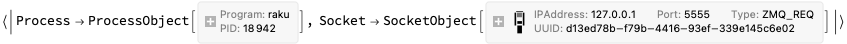

In [15]:
StartRakuProcess["Raku" -> $HomeDirectory<>"/.rakubrew/shims/raku"]

In [16]:
shellSession = StartExternalSession["Shell"];

### Handy conversion function

Make an "alias" for the UNIX (macOS or Linux) Command Line Interface (CLI) program `ToDataQueryWorkflowCode`:

In [60]:
Clear[FromDSL];
FromDSL[spec_String, target_String : "WL::System"] := FromDSL[shellSession, spec, target];
FromDSL[shellSession_ExternalSessionObject, spec_String, target_String : "WL::System"] := ExternalEvaluate[shellSession, "ToDataQueryWorkflowCode " <> target <>" '" <> spec <> "'"];

Try out the alias:`

obj = dfTitanic


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfTitanic', ExitCode -> 0, 
 
>    StandardError -> , StandardOutput -> obj = dfTitanic|>]
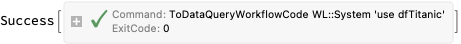

In [20]:
FromDSL["use dfTitanic"]

### Options settings

Here we set `MaxItems` option for `Dataset` to show all collumns:

{Alignment -> {Left, Baseline}, Background -> None, DatasetDisplayPanel -> {}, 
 
>   DatasetTheme -> Automatic, HeaderAlignment -> {Left, Baseline}, 
 
>   HeaderBackground -> Automatic, HeaderDisplayFunction -> Automatic, 
 
>   HeaderSize -> Automatic, HeaderStyle -> None, HiddenItems -> None, 
 
>   ItemDisplayFunction -> Automatic, ItemSize -> Automatic, ItemStyle -> None, 
 
>   MaxItems -> {15, All}, Method -> Automatic, ScrollPosition -> {1, 1}}
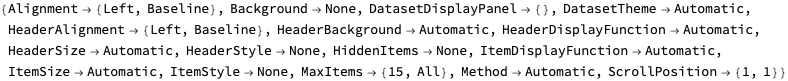

In [71]:
SetOptions[Dataset, MaxItems->{15, All}]

------

## Multi-language translation

In this section show that the Raku package "DSL::English::DataQueryWorkflows" generates code for multiple programming languages.
Also, it translates the English DSL into DSLs of other natural languages.

### Programming languages

#   Language
 
>    Code



1   Julia
 
     obj = dfTitanic
     obj = groupby( obj, [:passengerClass] )
>    obj = combine(obj, nrow)



2   Python
 
     obj = dfTitanic.copy()
     obj = obj.groupby(["passengerClass"])
>    obj = obj.size()



3   R
 
     obj <- dfTitanic ;
     obj <- split( x = obj, f = "passengerClass" ) ;
>    obj = length(obj)



4   Raku
 
     $obj = dfTitanic ;
     $obj = group-by($obj, "passengerClass") ;
>    $obj = $obj>>.elems

5   WL         Hold[obj = dfTitanic; obj = GroupBy[obj, #1[passengerClass] & ]; 
 
>     obj = Length /@ obj]
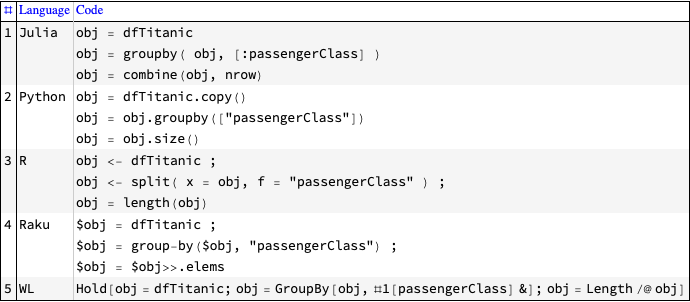

In [26]:
command="use dfTitanic; group by passengerClass; counts;";
dsRes=Dataset@Map[<| "Language" -> #, "Code" -> ToDataQueryWorkflowCode[command, "Target"->#, "Execute"->False] |> &, {"Julia", "Python", "R", "Raku", "WL"}];
ResourceFunction["GridTableForm"][dsRes]

### Natural languages

#   Language    Code

                използвай таблицата: dfTitanic
                групирай с колоните: passengerClass
1   Bulgarian   намери броя

                use the data table: dfTitanic
                group by the columns: passengerClass
2   English     find the count(s)

                테이블 사용: dfTitanic
                열로 그룹화: passengerClass
3   Korean      하위 그룹의 크기 찾기

                использовать таблицу: dfTitanic
                групировать с колонками: passengerClass
4   Russian     найти число

                utilizar la tabla: dfTitanic
                agrupar con columnas: "passengerClass"
5   Spanish     encontrar recuentos
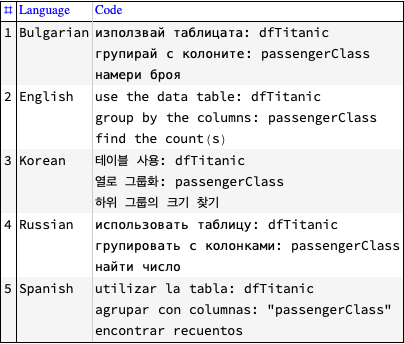

In [24]:
dsRes=Dataset@Map[<| "Language" -> #, "Code" -> ToDataQueryWorkflowCode[command, "Target"->#, "Execute"->False] |> &, {"Bulgarian", "English", "Korean", "Russian", "Spanish"}];
ResourceFunction["GridTableForm"][dsRes]

------

## Using `ToDataQueryWorkflowCode`

The WL package "DSLMode.m", [AAp1], provides the function `ToDataQueryWorkflowCode`.
Here is its usage message:

Translates a natural language commands into a Data Query Workflow code.
ToDataQueryWorkflowCode[ExternalParsersHookup`Private`command_String, 

 
>     ExternalParsersHookup`Private`opts:OptionsPattern[]] := 

 
>    ToMonadicCommand[ExternalParsersHookup`Private`command, 

 
>     "DSL::English::DataQueryWorkflows", ExternalParsersHookup`Private`opts]
 
ToDataQueryWorkflowCode[___] := $Failed
 


Options[ToDataQueryWorkflowCode]={Target -> WL, Execute -> Automatic, 
 
>    StringResult -> Automatic}
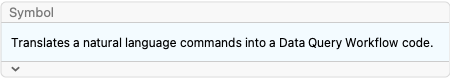

In [29]:
?ToDataQueryWorkflowCode 

Here are function's options:

In [30]:
ToDataQueryWorkflowCode//Options

{Target -> WL, Execute -> Automatic, StringResult -> Automatic}

------

## Trivial workflow

In this section we demonstrate code generation and execution results for very simple (and very frequently used) sequence of data wrangling operations.

### Code generation

For the simple specification:

In [31]:
command0 = "
use dfTitanic;
group by passengerClass;
show counts;
"

use dfTitanic;group by passengerClass;show counts;

We generate target code with `ToDataQueryWorkflowCode` using the alias `to_pandas` defined above:

obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
Echo[Map[ Length, obj], "counts:"]


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfTitanic;group by passengerClass;show\
 
>      counts;', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> obj = dfTitanic;                           |>]
                       obj = GroupBy[ obj, #["passengerClass"]& ];
                       Echo[Map[ Length, obj], "counts:"]
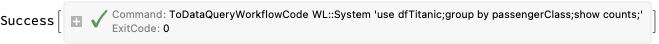

In [32]:
FromDSL[command0]

Here is the execution and result of the aliased shell command:

In [33]:
obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
Echo[Map[ Length, obj], "counts:"]

>> counts: Dataset[<|1st -> 323, 2nd -> 277, 3rd -> 709|>, 
 
>    TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>     TypeSystem`AnyLength], <||>]


Dataset[<|1st -> 323, 2nd -> 277, 3rd -> 709|>, 
 
>   TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>    TypeSystem`AnyLength], <||>]

**Remark:** Executing the commands above puts the generated code into the clipboard of the Operating System (OS).

### Execution steps

Get the dataset into a "pipeline object":

In [36]:
obj = dfTitanic;
Dimensions[obj]

{1309, 5}

Group by column:

In [38]:
obj = GroupBy[ obj, #["passengerClass"]& ];
Length[obj]

3

Print the group sizes of the "pipeline object":

In [40]:
Map[Length, obj]

Dataset[<|1st -> 323, 2nd -> 277, 3rd -> 709|>, 
 
>   TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>    TypeSystem`AnyLength], <||>]

------

## Cross tabulation

[Cross tabulation](https://en.wikipedia.org/wiki/Contingency_table) is a fundamental data wrangling operation. For the related transformations to long- and wide-format see the section "Complicated and neat workflow".

### Code generation

Here we define a command that filters the Titanic dataset and then makes cross-tabulates:

In [41]:
command1 = "
use dfTitanic;
filter with passengerSex is \"male\" and passengerSurvival equals \"died\" or passengerSurvival is \"survived\" ;
cross tabulate passengerClass, passengerSurvival over passengerAge;
take pipeline value
"

use dfTitanic;filter with passengerSex is "male" and passengerSurvival equals "died" or\
 
>   passengerSurvival is "survived" ;cross tabulate passengerClass, passengerSurvival\
 
>   over passengerAge;take pipeline value

obj = dfTitanic;
obj = Select[ obj, #["passengerSex"] == "male" && #["passengerSurvival"] ==\
 
>   "died" || #["passengerSurvival"] == "survived" & ];
obj = ResourceFunction["CrossTabulate"][ { #["passengerClass"],\
 
>   #["passengerSurvival"], #["passengerAge"] }& /@ obj ];
obj


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfTitanic;filter with passengerSex is\
 
>      "male" and passengerSurvival equals "died" or passengerSurvival is "survived"\
 
>      ;cross tabulate passengerClass, passengerSurvival over passengerAge;take pipeline\
 
>      value', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> 
 
>     obj = dfTitanic;
      obj = Select[ obj, #["passengerSex"] == "male" && #["passengerSurvival"] == "died"\
       
      >   || #["passengerSurvival"] == "survived" & ];
      obj = ResourceFunction["CrossTabulate"][ { #["passengerClass"],\
       
      >   #["passengerSurvival"], #["passengerAge"] }& /@ obj ];
      obj
 
>     |>]
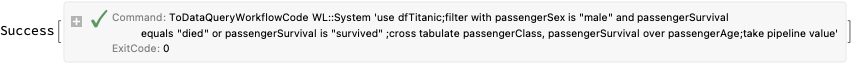

In [42]:
FromDSL[command1]

#### Execution

In [43]:
obj = dfTitanic;
obj = Select[ obj, #["passengerSex"] == "male" && #["passengerSurvival"] == "died" || #["passengerSurvival"] == "survived" & ];
obj = ResourceFunction["CrossTabulate"][ { #["passengerClass"], #["passengerSurvival"], #["passengerAge"] }& /@ obj ];
obj

Dataset[<|1st -> <|died -> 4290, survived -> 6671|>, 
 
>    2nd -> <|died -> 4419, survived -> 2776|>, 
 
>    3rd -> <|died -> 7562, survived -> 2720|>|>, 
 
>   TypeSystem`Assoc[TypeSystem`Atom[String], 
 
>    TypeSystem`Struct[{died, survived}, 
 
>     {TypeSystem`Atom[Integer], TypeSystem`Atom[Integer]}], 3], <||>]

### Execution steps

Copy the Titanic data into a "pipeline object" and show its dimensions and a sample of it:


In [49]:
obj = dfTitanic;
Print["Dimensions:", Dimensions[obj]];
obj[[1;;7]]

Dimensions:{1309, 5}


Dataset[{<|id -> 1, passengerClass -> 1st, passengerAge -> 30, passengerSex -> female, 
 
>     passengerSurvival -> survived|>, 
 
>    <|id -> 2, passengerClass -> 1st, passengerAge -> 0, passengerSex -> male, 
 
>     passengerSurvival -> survived|>, 
 
>    <|id -> 3, passengerClass -> 1st, passengerAge -> 0, passengerSex -> female, 
 
>     passengerSurvival -> died|>, <|id -> 4, passengerClass -> 1st, passengerAge -> 30, 
 
>     passengerSex -> male, passengerSurvival -> died|>, 
 
>    <|id -> 5, passengerClass -> 1st, passengerAge -> 20, passengerSex -> female, 
 
>     passengerSurvival -> died|>, <|id -> 6, passengerClass -> 1st, passengerAge -> 50, 
 
>     passengerSex -> male, passengerSurvival -> survived|>, 
 
>    <|id -> 7, passengerClass -> 1st, passengerAge -> 60, passengerSex -> female, 
 
>     passengerSurvival -> survived|>}, 
 
>   TypeSystem`Vector[TypeSystem`Struct[{id, passengerClass, passengerAge, passengerSex, 
 
>      passengerSurvival}, {TypeSystem`Atom[Integer], 
 
>      TypeSystem`Atom[TypeSystem`Enumeration[1st, 2nd, 3rd]], TypeSystem`Atom[Integer], 
 
>      TypeSystem`Atom[TypeSystem`Enumeration[female, male]], 
 
>      TypeSystem`Atom[TypeSystem`Enumeration[died, survived]]}], 7], <||>]

Filter the data and show the number of rows in the result set:

In [52]:
obj = Select[ obj, #["passengerSex"] == "male" && #["passengerSurvival"] == "died" || #["passengerSurvival"] == "survived" & ];
Dimensions[obj]

{1182, 5}

Cross tabulate and show the result:

In [54]:
obj = ResourceFunction["CrossTabulate"][ { #["passengerClass"], #["passengerSurvival"], #["passengerAge"] }& /@ obj ];
obj

Dataset[<|1st -> <|died -> 4290, survived -> 6671|>, 
 
>    2nd -> <|died -> 4419, survived -> 2776|>, 
 
>    3rd -> <|died -> 7562, survived -> 2720|>|>, 
 
>   TypeSystem`Assoc[TypeSystem`Atom[String], 
 
>    TypeSystem`Struct[{died, survived}, 
 
>     {TypeSystem`Atom[Integer], TypeSystem`Atom[Integer]}], 3], <||>]

------

## Mutation with formulas

In this section we discuss formula utilization to mutate data. We show how to use column references.

Special care has to be taken when the specifying data mutations with formulas that reference to columns in the dataset.

The code corresponding to the `transform ...` line in this example produces
*expected* result for the target "R::tidyverse":

In [58]:
command2 = "use data frame dfStarwars;
keep the columns name, homeworld, mass & height;
transform with bmi = ${mass/height^2*10000};
filter rows by bmi >= 30 & height < 200;
arrange by the variables mass & height descending";

dfStarwars %>%
dplyr::select(name, homeworld, mass, height) %>%
dplyr::mutate(bmi = mass/height^2*10000) %>%
dplyr::filter(bmi >= 30 & height < 200) %>%
dplyr::arrange(desc(mass), desc(height))


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode R::tidyverse 'use data frame dfStarwars;keep the columns\
 
>      name, homeworld, mass & height;transform with bmi = ${mass/height^2*10000};filter\
 
>      rows by bmi >= 30 & height < 200;arrange by the variables mass & height\
 
>      descending', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> dfStarwars %>%                                  |>]
                       dplyr::select(name, homeworld, mass, height) %>%
                       dplyr::mutate(bmi = mass/height^2*10000) %>%
                       dplyr::filter(bmi >= 30 & height < 200) %>%
                       dplyr::arrange(desc(mass), desc(height))
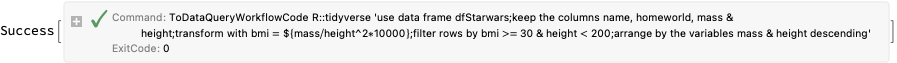

In [63]:
FromDSL[command2, "R::tidyverse"]

Specifically, for "WL::System" the transform specification line has to refer to the context variable `#`.
Here is an example:


In [75]:
command2p = "
use data frame dfStarwars;
transform with bmi = ${#[\"mass\"]/#[\"height\"]^2*10000} and homeworld = ${ToUpperCase@ToString@#[\"homeworld\"]};
take pipeline value";

obj = dfStarwars;
obj = Map[ Join[ #, <|"bmi" -> #["mass"]/#["height"]^2*10000, "homeworld" ->\
 
>   ToUpperCase@ToString@#["homeworld"]|> ]&, obj];
obj


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use data frame dfStarwars;transform with bmi =\
 
>      ${#["mass"]/#["height"]^2*10000} and homeworld =\
 
>      ${ToUpperCase@ToString@#["homeworld"]};take pipeline value', ExitCode -> 0, 
 
>    StandardError -> , StandardOutput -> 
 
>     obj = dfStarwars;                                                            |>]
      obj = Map[ Join[ #, <|"bmi" -> #["mass"]/#["height"]^2*10000, "homeworld" ->\
       
      >   ToUpperCase@ToString@#["homeworld"]|> ]&, obj];
      obj
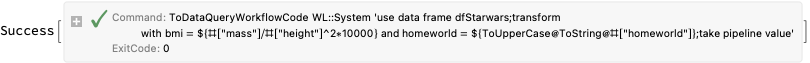

In [76]:
FromDSL[command2p]

Dataset[{<|name -> Luke Skywalker, height -> 172, mass -> 77, hair_color -> blond, 
 
>     skin_color -> fair, eye_color -> blue, birth_year -> 19, sex -> male, 
 
                                                                           48125
>     gender -> masculine, homeworld -> TATOOINE, species -> Human, bmi -> -----|>, 
                                                                           1849
 
>    <|name -> C-3PO, height -> 167, mass -> 75, hair_color -> NA, skin_color -> gold, 
 
>     eye_color -> yellow, birth_year -> 112, sex -> none, gender -> masculine, 
 
                                                      750000
>     homeworld -> TATOOINE, species -> Droid, bmi -> ------|>, 
                                                      27889
 
>    <|name -> R2-D2, height -> 96, mass -> 32, hair_color -> NA, 
 
>     skin_color -> white, blue, eye_color -> red, birth_year -> 33, sex -> none, 
 
                                                                        625
>     gender -> masculine, homeworld -> NABOO, species -> Droid, bmi -> ---|>, 
                                                                        18
 
>    <|name -> Darth Vader, height -> 202, mass -> 136, hair_color -> none, 
 
>     skin_color -> white, eye_color -> yellow, birth_year -> 41.9, sex -> male, 
 
                                                                           340000
>     gender -> masculine, homeworld -> TATOOINE, species -> Human, bmi -> ------|>, 
                                                                           10201
 
>    <|name -> Leia Organa, height -> 150, mass -> 49, hair_color -> brown, 
 
>     skin_color -> light, eye_color -> brown, birth_year -> 19, sex -> female, 
 
                                                                          196
>     gender -> feminine, homeworld -> ALDERAAN, species -> Human, bmi -> ---|>, 
                                                                           9
 
>    <|name -> Owen Lars, height -> 178, mass -> 120, hair_color -> brown, grey, 
 
>     skin_color -> light, eye_color -> blue, birth_year -> 52, sex -> male, 
 
                                                                           300000
>     gender -> masculine, homeworld -> TATOOINE, species -> Human, bmi -> ------|>, 
                                                                            7921
 
>    <|name -> Beru Whitesun lars, height -> 165, mass -> 75, hair_color -> brown, 
 
>     skin_color -> light, eye_color -> blue, birth_year -> 47, sex -> female, 
 
                                                                          10000
>     gender -> feminine, homeworld -> TATOOINE, species -> Human, bmi -> -----|>, 
                                                                           363
 
>    <|name -> R5-D4, height -> 97, mass -> 32, hair_color -> NA, 
 
>     skin_color -> white, red, eye_color -> red, birth_year -> NA, sex -> none, 
 
                                                                           320000
>     gender -> masculine, homeworld -> TATOOINE, species -> Droid, bmi -> ------|>, 
                                                                            9409
 
>    <|name -> Biggs Darklighter, height -> 183, mass -> 84, hair_color -> black, 
 
>     skin_color -> light, eye_color -> brown, birth_year -> 24, sex -> male, 
 
                                                                           280000
>     gender -> masculine, homeworld -> TATOOINE, species -> Human, bmi -> ------|>, 
                                                                           11163
 
>    <|name -> Obi-Wan Kenobi, height -> 182, mass -> 77, hair_color -> auburn, white, 
 
>     skin_color -> fair, eye_color -> blue-gray, birth_year -> 57, sex -> male, 
 
                                                                          27500
>     gender -> masculine, homeworld -> STEWJON, species -> Human, bmi -> -----|>, 
                                     
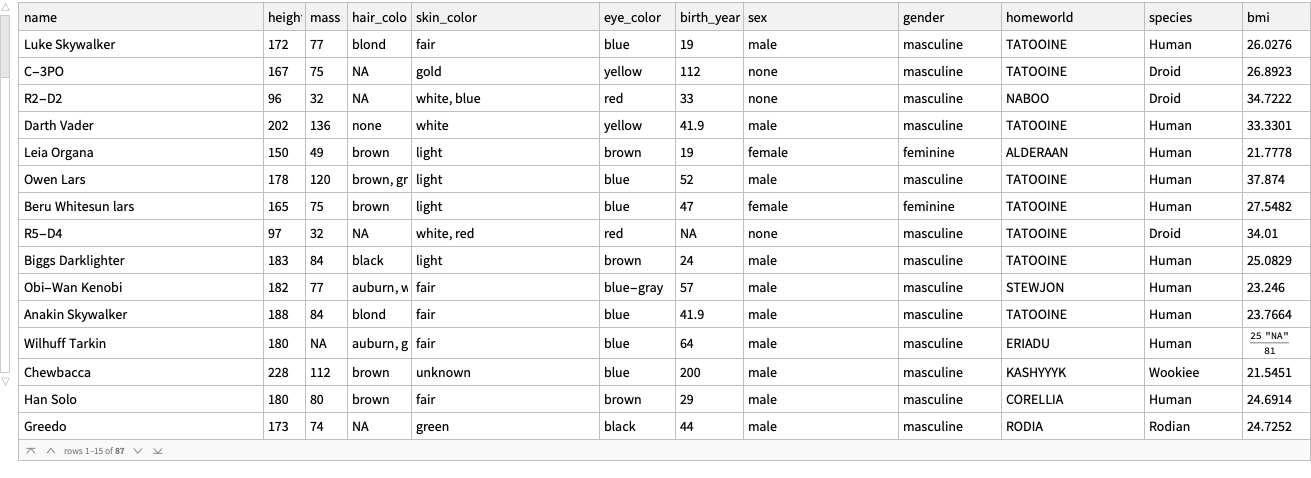

In [77]:
obj = dfStarwars;
obj = Map[ Join[ #, <|"bmi" -> #["mass"]/#["height"]^2*10000, "homeworld" -> ToUpperCase@ToString@#["homeworld"]|> ]&, obj];
obj


**Remark:** Note that we have to use single quotes for the command invocation; using double quotes will invoke the string interpolation feature.

------

## Grouping awareness

In this section we discuss the treatment of multiple "group by" invocations within the same DSL specification.

### Code generation

Since there is no expectation to have a dedicated data transformation monad -- in whatever programming language -- we can try to make the command sequence parsing to be "aware" of the grouping operations.

In the following example before applying the grouping operation in fourth line we have to flatten the data (which is grouped in the second line):

In [81]:
command3 = "
use dfTitanic;
group by passengerClass;
echo counts;
group by passengerSex;
show counts
";

obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
Echo[Map[ Length, obj], "counts:"];
obj = GroupBy[ Join @@ obj, #["passengerSex"]& ];
Echo[Map[ Length, obj], "counts:"]


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfTitanic;group by passengerClass;echo\
 
>      counts;group by passengerSex;show counts', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> obj = dfTitanic;                                 |>]
                       obj = GroupBy[ obj, #["passengerClass"]& ];
                       Echo[Map[ Length, obj], "counts:"];
                       obj = GroupBy[ Join @@ obj, #["passengerSex"]& ];
                       Echo[Map[ Length, obj], "counts:"]
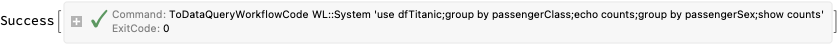

In [82]:
FromDSL[command3]

### Execution

Here we execute the generated code:

In [83]:
obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
Echo[Map[ Length, obj], "counts:"];
obj = GroupBy[ Join @@ obj, #["passengerSex"]& ];
Echo[Map[ Length, obj], "counts:"]

>> counts: Dataset[<|1st -> 323, 2nd -> 277, 3rd -> 709|>, 
 
>    TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>     TypeSystem`AnyLength], <||>]
>> counts: Dataset[<|female -> 466, male -> 843|>, 
 
>    TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>     TypeSystem`AnyLength], <||>]


Dataset[<|female -> 466, male -> 843|>, 
 
>   TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>    TypeSystem`AnyLength], <||>]

### Execution steps

First grouping:

In [106]:
obj = dfTitanic;
obj = GroupBy[ obj, #["passengerClass"]& ];
Echo[Map[ Length, obj], "counts:"];

>> counts: Dataset[<|1st -> 323, 2nd -> 277, 3rd -> 709|>, 
 
>    TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>     TypeSystem`AnyLength], <||>]


Before doing the second grouping we flatten the groups of the first:

In [109]:
obj = Join @@ obj;
Dimensions[obj]

{1309, 5}

Here we do the second grouping and print-out the group sizes:

In [111]:
obj = GroupBy[ obj, #["passengerSex"]& ];
Echo[Map[ Length, obj], "counts:"];

>> counts: Dataset[<|female -> 466, male -> 843|>, 
 
>    TypeSystem`Assoc[TypeSystem`AnyType, TypeSystem`Atom[Integer], 
 
>     TypeSystem`AnyLength], <||>]


------

## Non-trivial workflow

In this section we generate and demonstrate data wrangling steps that clean, mutate, filter, group, and summarize a given dataset.

### Code generation


In [161]:
command4 = "
use dfStarwars;
replace missing with 0;
mutate with \"mass\" = ${obj[\"mass\"]} and \"height\" = ${obj[\"height\"]};  
show dimensions;
echo summary;
filter by birth_year greater than 27;
select homeworld, mass and height;
group by homeworld;
show counts;
summarize the variables mass and height with Mean and Median
";

obj = dfStarwars;
obj = ReplaceAll[ obj, _Missing -> 0 ];
obj = Map[ Join[ #, <|"mass" -> obj["mass"], "height" -> obj["height"]|> ]&,\
 
>   obj];
Echo[Dimensions[obj], "dimensions:"];
Echo[ResourceFunction["RecordsSummary"][obj], "summary:"];
obj = Select[ obj, #["birth_year"] > 27 & ];
obj = Map[ KeyTake[ #, {"homeworld", "mass", "height"} ]&, obj];
obj = GroupBy[ obj, #["homeworld"]& ];
Echo[Map[ Length, obj], "counts:"];
obj = Dataset[obj][All, Association @ Flatten @ Outer[ToString[#1] <> "_" <>\
 
>   ToString[#2] -> Query[#2, #1] &,{"mass", "height"}, {Mean, Median}]]


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfStarwars;replace missing with 0;mutate\
 
>      with "mass" = ${obj["mass"]} and "height" = ${obj["height"]};  show\
 
>      dimensions;echo summary;filter by birth_year greater than 27;select homeworld,\
 
>      mass and height;group by homeworld;show counts;summarize the variables mass and\
 
>      height with Mean and Median', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> 
 
>     obj = dfStarwars;                                                                 \
      obj = ReplaceAll[ obj, _Missing -> 0 ];
      obj = Map[ Join[ #, <|"mass" -> obj["mass"], "height" -> obj["height"]|> ]&, obj];
      Echo[Dimensions[obj], "dimensions:"];
      Echo[ResourceFunction["RecordsSummary"][obj], "summary:"];
      obj = Select[ obj, #["birth_year"] > 27 & ];
      obj = Map[ KeyTake[ #, {"homeworld", "mass", "height"} ]&, obj];
      obj = GroupBy[ obj, #["homeworld"]& ];
      Echo[Map[ Length, obj], "counts:"];
      obj = Dataset[obj][All, Association @ Flatten @ Outer[ToString[#1] <> "_" <>\
       
      >   ToString[#2] -> Query[#2, #1] &,{"mass", "height"}, {Mean, Median}]]
 
>     |>]
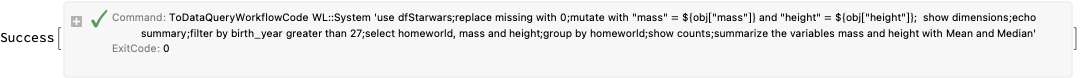

In [162]:
FromDSL[command4]

### Execution

In [173]:
obj = dfStarwars;
obj = ReplaceAll[ obj, _Missing -> 0 ];
obj = Map[ Join[ #, <|"mass" -> obj["mass"], "height" -> obj["height"]|> ]&, obj];
Echo[Dimensions[obj], "dimensions:"];
Echo[ResourceFunction["RecordsSummary"][obj], "summary:"];
obj = Select[ obj, #["birth_year"] > 27 & ];
obj = Map[ KeyTake[ #, {"homeworld", "mass", "height"} ]&, obj];
obj = GroupBy[ obj, #["homeworld"]& ];
Echo[Map[ Length, obj], "counts:"];

>> dimensions: {87, 11}
>> summary: {1 name                  , 
             Ackbar                1

             Adi Gallia            1

             Anakin Skywalker      1

             Arvel Crynyd          1

             Ayla Secura           1

             Bail Prestor Organa   1

             (Other)               81
 
>    2 height                                                                \
     Failure[Dataset, {MessageTemplate :> Dataset::partnotapplicable, 
      
     >     MessageParameters -> 
      
     >      <|Type -> 
      
     >        TypeSystem`Vector[TypeSystem`Struct[{name, height, mass, 
      
     >           hair_color, skin_color, eye_color, birth_year, sex, gender, 
      
     >           homeworld, species}, 
      
     >          {TypeSystem`Atom[String], TypeSystem`AnyType, 
      
     >           TypeSystem`AnyType, TypeSystem`Atom[String], 
      
     >           TypeSystem`Atom[String], TypeSystem`Atom[String], 
      
     >          

Rectangular array of real numbers is expected at position 1
 
>    in TagBox[RowBox[{Median, [, RowBox[{{, 
 
>         RowBox[{InterpretationBox[RowBox[{Failure, [, 
 
>              DynamicModuleBox[{Typeset`open$$ = False, Typeset`embedState$$ = Ready}, 
 
>               TemplateBox[{PaneSelectorBox[{False -> 
 
                         Message:       Part mass is not applicable to expressions of\
>                                                                                      , 
                         >    the form {__Association}.

                        Tag:               Dataset
 
>                   True -> 
 
                         Message:       Part mass is not applicable to expressions of\
>                                                                                      }\
                         >    the form {__Association}.

                        Tag:               Dataset
 
>                   , Dynamic[Typeset`open$$], ImageSize -> Automatic]}, SummaryPanel], 
 
>               DynamicModuleValues :> {}], ]}], 
 
>            Failure[Dataset, Association[MessageTemplate :> Dataset::partnotapplicable, 
 
>              MessageParameters -> 
 
>               Association[Type -> 
 
>                 TypeSystem`Vector[TypeSystem`Struct[{name, height, mass, hair_color, 
 
>                    skin_color, eye_color, birth_year, sex, gender, homeworld, species}\
 
>                    , {TypeSystem`Atom[String], TypeSystem`AnyType, TypeSystem`AnyType, 
 
>                    TypeSystem`Atom[String], TypeSystem`Atom[String], 
 
>                    TypeSystem`Atom[String], TypeSystem`AnyType, 
 
>                    TypeSystem`Atom[TypeSystem`Enumeration[female, hermaphroditic, 
 
>                      male, NA, none]], 
 
>                    TypeSystem`Atom[TypeSystem`Enumeration[feminine, masculine, NA]], 
 
>                    TypeSystem`Atom[String], TypeSystem`Atom[String]}], 87], 
 
>                Part -> mass, Symbol -> Part]]], Selectable -> False, 
 
>            Editable -> False, SelectWithContents -> True], ,, 
 
>           InterpretationBox[RowBox[{Failure, [, 
 
>              DynamicModuleBox[{Typeset`open$$ = False, Typeset`embedState$$ = Ready}, 
 
>               TemplateBox[{PaneSelectorBox[{False -> 
 
                         Message:       Part mass is not applicable to expressions of\
>                                                                                      , 
                         >    the form {__Association}.

                        Tag:               Dataset
 
>                   True -> 
 
                         Message:       Part mass is not applicable to expressions of\
>                                                                                      }\
                         >    the form {__Association}.

                        Tag:               Dataset
 
>                   , Dynamic[Typeset`open$$], ImageSize -> Automatic]}, SummaryPanel], 
 
>               DynamicModuleValues :> {}], ]}], 
 
>            Failure[Dataset, Association[MessageTemplate :> Dataset::partnotapplicable, 
 
>              MessageParameters -> 
 
>               Association[Type -> 
 
>                 TypeSystem`Vector[TypeSystem`Struct[{name, height, mass, hair_color, 
 
>                    skin_color, eye_color, birth_year, sex, gender, homeworld, species}\
 
>                    , {TypeSystem`Atom[String], TypeSystem`AnyType, TypeSystem`AnyType, 
 
>                    TypeSystem`Atom[String], TypeSystem`Atom[String], 
 
>                    TypeSystem`Atom[String], TypeSystem`AnyType, 
 
>                    TypeSystem`Atom[TypeSystem`Enumeration[female, hermaphroditic, 
 
>                      male, NA, none]], 
 
>                    TypeSystem`Atom[TypeSystem`Enumeration[feminine, masculine, NA]], 
 
>                    TypeSystem`Atom[String], TypeSystem`Atom[String]}], 87], 
 
>                Part -> mass, Symbol -> Part]]], Sel
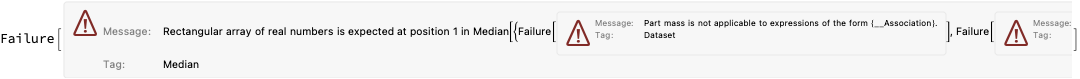

In [182]:
obj = Dataset[obj][All, Association @ Flatten @ Outer[ToString[#1] <> "_" <> ToString[#2] -> Query[#2, #1] &,{"mass", "height"}, {Mean, Median}]]

### Execution steps

Here is code that cleans the data of missing values, and shows dimensions and summary (corresponds to the first five lines above):

Here is a sample of the dataset (wrangled so far):

Here we select the columns "homeworld", "mass", and "height", group by "homeworld", and show counts for each group:

Here is summarization at specified columns with specified functions:


------

## Joins

In this section we demonstrate the fundamental operation of joining two datasets.

### Code generation


In [190]:
command5 = "
use dfStarwarsFilms;
left join with dfStarwars by 'name';
replace missing with ${0};
sort by name, film desc;
take pipeline value
";

obj = dfStarwarsFilms;
obj = JoinAcross[ obj, dfStarwars, {"name"}, "Left"];
obj = ReplaceAll[ obj, _Missing -> 0 ];
obj = ReverseSortBy[ obj, {#["name"], #["film"]}& ];
obj


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfStarwarsFilms;left join with dfStarwars\
 
>      by 'name';replace missing with ${0};sort by name, film desc;take pipeline value', 
 
>    ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> obj = dfStarwarsFilms;                               |>]
                       obj = JoinAcross[ obj, dfStarwars, {"name"}, "Left"];
                       obj = ReplaceAll[ obj, _Missing -> 0 ];
                       obj = ReverseSortBy[ obj, {#["name"], #["film"]}& ];
                       obj
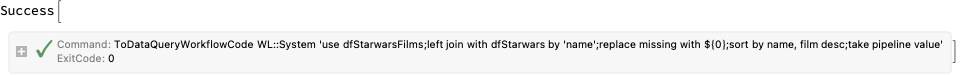

In [191]:
FromDSL[command5]

### Execution

In [192]:
obj = dfStarwarsFilms;
obj = JoinAcross[ obj, dfStarwars, {"name"}, "Left"];
obj = ReplaceAll[ obj, _Missing -> 0 ];
obj = ReverseSortBy[ obj, {#["name"], #["film"]}& ];
obj

Dataset[{<|name -> Zam Wesell, film -> Attack of the Clones, height -> 168, mass -> 55, 
 
>     hair_color -> blonde, skin_color -> fair, green, yellow, eye_color -> yellow, 
 
>     birth_year -> NA, sex -> female, gender -> feminine, homeworld -> Zolan, 
 
>     species -> Clawdite|>, <|name -> Yoda, film -> The Phantom Menace, height -> 66, 
 
>     mass -> 17, hair_color -> white, skin_color -> green, eye_color -> brown, 
 
>     birth_year -> 896, sex -> male, gender -> masculine, homeworld -> NA, 
 
>     species -> Yoda's species|>, <|name -> Yoda, film -> The Empire Strikes Back, 
 
>     height -> 66, mass -> 17, hair_color -> white, skin_color -> green, 
 
>     eye_color -> brown, birth_year -> 896, sex -> male, gender -> masculine, 
 
>     homeworld -> NA, species -> Yoda's species|>, 
 
>    <|name -> Yoda, film -> Revenge of the Sith, height -> 66, mass -> 17, 
 
>     hair_color -> white, skin_color -> green, eye_color -> brown, birth_year -> 896, 
 
>     sex -> male, gender -> masculine, homeworld -> NA, species -> Yoda's species|>, 
 
>    <|name -> Yoda, film -> Return of the Jedi, height -> 66, mass -> 17, 
 
>     hair_color -> white, skin_color -> green, eye_color -> brown, birth_year -> 896, 
 
>     sex -> male, gender -> masculine, homeworld -> NA, species -> Yoda's species|>, 
 
>    <|name -> Yoda, film -> Attack of the Clones, height -> 66, mass -> 17, 
 
>     hair_color -> white, skin_color -> green, eye_color -> brown, birth_year -> 896, 
 
>     sex -> male, gender -> masculine, homeworld -> NA, species -> Yoda's species|>, 
 
>    <|name -> Yarael Poof, film -> The Phantom Menace, height -> 264, mass -> NA, 
 
>     hair_color -> none, skin_color -> white, eye_color -> yellow, birth_year -> NA, 
 
>     sex -> male, gender -> masculine, homeworld -> Quermia, species -> Quermian|>, 
 
>    <|name -> Wilhuff Tarkin, film -> Revenge of the Sith, height -> 180, mass -> NA, 
 
>     hair_color -> auburn, grey, skin_color -> fair, eye_color -> blue, 
 
>     birth_year -> 64, sex -> male, gender -> masculine, homeworld -> Eriadu, 
 
>     species -> Human|>, <|name -> Wilhuff Tarkin, film -> A New Hope, height -> 180, 
 
>     mass -> NA, hair_color -> auburn, grey, skin_color -> fair, eye_color -> blue, 
 
>     birth_year -> 64, sex -> male, gender -> masculine, homeworld -> Eriadu, 
 
>     species -> Human|>, <|name -> Wicket Systri Warrick, film -> Return of the Jedi, 
 
>     height -> 88, mass -> 20, hair_color -> brown, skin_color -> brown, 
 
>     eye_color -> brown, birth_year -> 8, sex -> male, gender -> masculine, 
 
>     homeworld -> Endor, species -> Ewok|>, 
 
>    <|name -> Wedge Antilles, film -> The Empire Strikes Back, height -> 170, 
 
>     mass -> 77, hair_color -> brown, skin_color -> fair, eye_color -> hazel, 
 
>     birth_year -> 21, sex -> male, gender -> masculine, homeworld -> Corellia, 
 
>     species -> Human|>, <|name -> Wedge Antilles, film -> Return of the Jedi, 
 
>     height -> 170, mass -> 77, hair_color -> brown, skin_color -> fair, 
 
>     eye_color -> hazel, birth_year -> 21, sex -> male, gender -> masculine, 
 
>     homeworld -> Corellia, species -> Human|>, 
 
>    <|name -> Wedge Antilles, film -> A New Hope, height -> 170, mass -> 77, 
 
>     hair_color -> brown, skin_color -> fair, eye_color -> hazel, birth_year -> 21, 
 
>     sex -> male, gender -> masculine, homeworld -> Corellia, species -> Human|>, 
 
>    <|name -> Watto, film -> The Phantom Menace, height -> 137, mass -> NA, 
 
>     hair_color -> black, skin_color -> blue, grey, eye_color -> yellow, 
 
>     birth_year -> NA, sex -> male, gender -> masculine, homeworld -> Toydaria, 
 
>     species -> Toydarian|>, <|name -> Watto, film -> Attack of the Clones, 
 
>     height -> 137, mass -> NA, hair_color -> black, skin_color -> blue, grey, 
 
>     eye_color -> yellow, birth_year -> NA, sex -> male, gender -> masculine, 
 
>     homeworld -> Toydaria, species -> Toydarian|>, 
 
>    <|na

------

## Complicated and neat workflow

In this section we demonstrate a fairly complicated data wrangling sequence of operations that transforms [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe's_quartet) into a form that is easier to plot.

**Remark:** Anscombe's quartet has four sets of points that have nearly the same x- and y- mean values. (But the sets have very different shapes.)

### Code generation

In [203]:
command6 = "
use dfAnscombe;
convert to long form;
separate the data column \"Variable\" into \"Variable\" and \"Set\" with separator pattern \"\";
to wide form for id columns Set and AutomaticKey variable column Variable and value column Value
";

obj = dfAnscombe;
obj = ToLongForm[ obj ];
obj = SeparateColumn[ obj, "Variable", {"Variable", "Set"}, "Separator" -> ""\
 
>   ];
obj = ToWideForm[ obj,  "IdentifierColumns" -> {"Set", "AutomaticKey"},\
 
>   "VariablesFrom" -> "Variable", "ValuesFrom" -> "Value" ]


Success[ExecutionCompleted, <|Command -> 
 
>     ToDataQueryWorkflowCode WL::System 'use dfAnscombe;convert to long form;separate\
 
>      the data column "Variable" into "Variable" and "Set" with separator pattern "";to\
 
>      wide form for id columns Set and AutomaticKey variable column Variable and value\
 
>      column Value', ExitCode -> 0, StandardError -> , 
 
>    StandardOutput -> 
 
>     obj = dfAnscombe;                                                               |>]
      obj = ToLongForm[ obj ];
      obj = SeparateColumn[ obj, "Variable", {"Variable", "Set"}, "Separator" -> "" ];
      obj = ToWideForm[ obj,  "IdentifierColumns" -> {"Set", "AutomaticKey"},\
       
      >   "VariablesFrom" -> "Variable", "ValuesFrom" -> "Value" ]
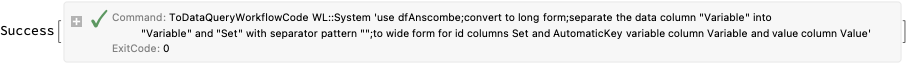

In [204]:
FromDSL[command6]

### Execution

In [205]:
obj = dfAnscombe;
obj = ToLongForm[ obj ];
obj = SeparateColumn[ obj, "Variable", {"Variable", "Set"}, "Separator" -> "" ];
obj = ToWideForm[ obj,  "IdentifierColumns" -> {"Set", "AutomaticKey"}, "VariablesFrom" -> "Variable", "ValuesFrom" -> "Value" ]


Dataset[{<|Set -> 1, AutomaticKey -> 1, X -> 10, Y -> 8.04|>, 
 
>    <|Set -> 2, AutomaticKey -> 1, X -> 10, Y -> 9.14|>, 
 
>    <|Set -> 3, AutomaticKey -> 1, X -> 10, Y -> 7.46|>, 
 
>    <|Set -> 4, AutomaticKey -> 1, X -> 8, Y -> 6.58|>, 
 
>    <|Set -> 1, AutomaticKey -> 2, X -> 8, Y -> 6.95|>, 
 
>    <|Set -> 2, AutomaticKey -> 2, X -> 8, Y -> 8.14|>, 
 
>    <|Set -> 3, AutomaticKey -> 2, X -> 8, Y -> 6.77|>, 
 
>    <|Set -> 4, AutomaticKey -> 2, X -> 8, Y -> 5.76|>, 
 
>    <|Set -> 1, AutomaticKey -> 3, X -> 13, Y -> 7.58|>, 
 
>    <|Set -> 2, AutomaticKey -> 3, X -> 13, Y -> 8.74|>, 
 
>    <|Set -> 3, AutomaticKey -> 3, X -> 13, Y -> 12.74|>, 
 
>    <|Set -> 4, AutomaticKey -> 3, X -> 8, Y -> 7.71|>, 
 
>    <|Set -> 1, AutomaticKey -> 4, X -> 9, Y -> 8.81|>, 
 
>    <|Set -> 2, AutomaticKey -> 4, X -> 9, Y -> 8.77|>, 
 
>    <|Set -> 3, AutomaticKey -> 4, X -> 9, Y -> 7.11|>, 
 
>    <|Set -> 4, AutomaticKey -> 4, X -> 8, Y -> 8.84|>, 
 
>    <|Set -> 1, AutomaticKey -> 5, X -> 11, Y -> 8.33|>, 
 
>    <|Set -> 2, AutomaticKey -> 5, X -> 11, Y -> 9.26|>, 
 
>    <|Set -> 3, AutomaticKey -> 5, X -> 11, Y -> 7.81|>, 
 
>    <|Set -> 4, AutomaticKey -> 5, X -> 8, Y -> 8.47|>, 
 
>    <|Set -> 1, AutomaticKey -> 6, X -> 14, Y -> 9.96|>, 
 
>    <|Set -> 2, AutomaticKey -> 6, X -> 14, Y -> 8.1|>, 
 
>    <|Set -> 3, AutomaticKey -> 6, X -> 14, Y -> 8.84|>, 
 
>    <|Set -> 4, AutomaticKey -> 6, X -> 8, Y -> 7.04|>, 
 
>    <|Set -> 1, AutomaticKey -> 7, X -> 6, Y -> 7.24|>, 
 
>    <|Set -> 2, AutomaticKey -> 7, X -> 6, Y -> 6.13|>, 
 
>    <|Set -> 3, AutomaticKey -> 7, X -> 6, Y -> 6.08|>, 
 
>    <|Set -> 4, AutomaticKey -> 7, X -> 8, Y -> 5.25|>, 
 
>    <|Set -> 1, AutomaticKey -> 8, X -> 4, Y -> 4.26|>, 
 
>    <|Set -> 2, AutomaticKey -> 8, X -> 4, Y -> 3.1|>, 
 
>    <|Set -> 3, AutomaticKey -> 8, X -> 4, Y -> 5.39|>, 
 
>    <|Set -> 4, AutomaticKey -> 8, X -> 19, Y -> 12.5|>, 
 
>    <|Set -> 1, AutomaticKey -> 9, X -> 12, Y -> 10.84|>, 
 
>    <|Set -> 2, AutomaticKey -> 9, X -> 12, Y -> 9.13|>, 
 
>    <|Set -> 3, AutomaticKey -> 9, X -> 12, Y -> 8.15|>, 
 
>    <|Set -> 4, AutomaticKey -> 9, X -> 8, Y -> 5.56|>, 
 
>    <|Set -> 1, AutomaticKey -> 10, X -> 7, Y -> 4.82|>, 
 
>    <|Set -> 2, AutomaticKey -> 10, X -> 7, Y -> 7.26|>, 
 
>    <|Set -> 3, AutomaticKey -> 10, X -> 7, Y -> 6.42|>, 
 
>    <|Set -> 4, AutomaticKey -> 10, X -> 8, Y -> 7.91|>, 
 
>    <|Set -> 1, AutomaticKey -> 11, X -> 5, Y -> 5.68|>, 
 
>    <|Set -> 2, AutomaticKey -> 11, X -> 5, Y -> 4.74|>, 
 
>    <|Set -> 3, AutomaticKey -> 11, X -> 5, Y -> 5.73|>, 
 
>    <|Set -> 4, AutomaticKey -> 11, X -> 8, Y -> 6.89|>}, 
 
>   TypeSystem`Vector[TypeSystem`Struct[{Set, AutomaticKey, X, Y}, 
 
>     {TypeSystem`Atom[TypeSystem`Enumeration[1, 2, 3, 4]], TypeSystem`Atom[Integer], 
 
>      TypeSystem`Atom[Integer], TypeSystem`Atom[Real]}], 44], <||>]

### Execution steps

Get a copy of the dataset into a "pipeline object":


In [209]:
obj = dfAnscombe;
obj

Dataset[{<|X1 -> 10, X2 -> 10, X3 -> 10, X4 -> 8, Y1 -> 8.04, Y2 -> 9.14, Y3 -> 7.46, 
 
>     Y4 -> 6.58|>, <|X1 -> 8, X2 -> 8, X3 -> 8, X4 -> 8, Y1 -> 6.95, Y2 -> 8.14, 
 
>     Y3 -> 6.77, Y4 -> 5.76|>, <|X1 -> 13, X2 -> 13, X3 -> 13, X4 -> 8, Y1 -> 7.58, 
 
>     Y2 -> 8.74, Y3 -> 12.74, Y4 -> 7.71|>, 
 
>    <|X1 -> 9, X2 -> 9, X3 -> 9, X4 -> 8, Y1 -> 8.81, Y2 -> 8.77, Y3 -> 7.11, 
 
>     Y4 -> 8.84|>, <|X1 -> 11, X2 -> 11, X3 -> 11, X4 -> 8, Y1 -> 8.33, Y2 -> 9.26, 
 
>     Y3 -> 7.81, Y4 -> 8.47|>, <|X1 -> 14, X2 -> 14, X3 -> 14, X4 -> 8, Y1 -> 9.96, 
 
>     Y2 -> 8.1, Y3 -> 8.84, Y4 -> 7.04|>, 
 
>    <|X1 -> 6, X2 -> 6, X3 -> 6, X4 -> 8, Y1 -> 7.24, Y2 -> 6.13, Y3 -> 6.08, 
 
>     Y4 -> 5.25|>, <|X1 -> 4, X2 -> 4, X3 -> 4, X4 -> 19, Y1 -> 4.26, Y2 -> 3.1, 
 
>     Y3 -> 5.39, Y4 -> 12.5|>, <|X1 -> 12, X2 -> 12, X3 -> 12, X4 -> 8, Y1 -> 10.84, 
 
>     Y2 -> 9.13, Y3 -> 8.15, Y4 -> 5.56|>, 
 
>    <|X1 -> 7, X2 -> 7, X3 -> 7, X4 -> 8, Y1 -> 4.82, Y2 -> 7.26, Y3 -> 6.42, 
 
>     Y4 -> 7.91|>, <|X1 -> 5, X2 -> 5, X3 -> 5, X4 -> 8, Y1 -> 5.68, Y2 -> 4.74, 
 
>     Y3 -> 5.73, Y4 -> 6.89|>}, TypeSystem`Vector[TypeSystem`Struct[{X1, X2, X3, X4, 
 
>      Y1, Y2, Y3, Y4}, {TypeSystem`Atom[Integer], TypeSystem`Atom[Integer], 
 
>      TypeSystem`Atom[Integer], TypeSystem`Atom[Integer], TypeSystem`Atom[Real], 
 
>      TypeSystem`Atom[Real], TypeSystem`Atom[Real], TypeSystem`Atom[Real]}], 11], <||>]


Summarize Anscombe's quartet (using the WFR function [`RecordsSummary`](https://resources.wolframcloud.com/FunctionRepository/resources/RecordsSummary/), [AAf2]):

{1 X1          , 2 X2          , 3 X3          , 4 X4       , 5 Y1            , 
 Min      4      Min      4      Min      4      1st Qu   8   Min      4.26

 1st Qu   6.25   1st Qu   6.25   1st Qu   6.25   3rd Qu   8   1st Qu   5.9975

 Mean     9      Mean     9      Mean     9      Median   8   Mean     7.50091

 Median   9      Median   9      Median   9      Min      8   Median   7.58

 3rd Qu   11.75  3rd Qu   11.75  3rd Qu   11.75  Mean     9   3rd Qu   8.69

 Max      14     Max      14     Max      14     Max      19  Max      10.84
 
>   6 Y2            , 7 Y3          , 8 Y4            }
    Min      3.1      Min      5.39   Min      5.25

    1st Qu   6.4125   1st Qu   6.165  1st Qu   5.965

    Mean     7.50091  Median   7.11   Median   7.04

    Median   8.14     Mean     7.5    Mean     7.50091

    3rd Qu   9.04     3rd Qu   8.065  3rd Qu   8.33

    Max      9.26     Max      12.74  Max      12.5
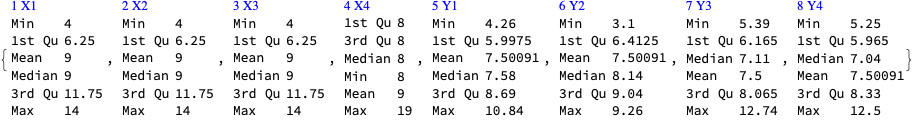

In [211]:
ResourceFunction["RecordsSummary"][obj]

**Remark:** From the table above it is not clear how exactly we have to access the data in order to plot each of Anscombe's sets. The data wrangling steps below show a way to separate the sets and make them amenable for set-wise manipulations.

Very often values of certain data parameters are conflated and put into dataset's column names. (As in Anscombe's dataset.)

In those situations we:

- Convert the dataset into long format, since that allows column names to be treated as data

- Separate the values of a certain column into to two or more columns

Reshape the "pipeline object" into [long format](https://en.wikipedia.org/wiki/Wide_and_narrow_data):

In [212]:
obj = ToLongForm[ obj ];
obj[[1;;7]]

Dataset[{<|AutomaticKey -> 1, Variable -> X1, Value -> 10|>, 
 
>    <|AutomaticKey -> 1, Variable -> X2, Value -> 10|>, 
 
>    <|AutomaticKey -> 1, Variable -> X3, Value -> 10|>, 
 
>    <|AutomaticKey -> 1, Variable -> X4, Value -> 8|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y1, Value -> 8.04|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y2, Value -> 9.14|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y3, Value -> 7.46|>}, 
 
>   TypeSystem`Vector[TypeSystem`Struct[{AutomaticKey, Variable, Value}, 
 
>     {TypeSystem`Atom[Integer], TypeSystem`Atom[String], TypeSystem`Atom[Real]}], 7], 
 
>   <||>]

Separate the data column "Variable" into the columns "Variable" and "Set":

In [214]:
obj = SeparateColumn[ obj, "Variable", {"Variable", "Set"}, "Separator" -> "" ];
obj[[1;;7]]

Dataset[{<|AutomaticKey -> 1, Variable -> X, Value -> 10, Set -> 1|>, 
 
>    <|AutomaticKey -> 1, Variable -> X, Value -> 10, Set -> 2|>, 
 
>    <|AutomaticKey -> 1, Variable -> X, Value -> 10, Set -> 3|>, 
 
>    <|AutomaticKey -> 1, Variable -> X, Value -> 8, Set -> 4|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y, Value -> 8.04, Set -> 1|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y, Value -> 9.14, Set -> 2|>, 
 
>    <|AutomaticKey -> 1, Variable -> Y, Value -> 7.46, Set -> 3|>}, 
 
>   TypeSystem`Vector[TypeSystem`Struct[{AutomaticKey, Variable, Value, Set}, 
 
>     {TypeSystem`Atom[Integer], TypeSystem`Atom[TypeSystem`Enumeration[X, Y]], 
 
>      TypeSystem`Atom[Real], TypeSystem`Atom[TypeSystem`Enumeration[1, 2, 3, 4]]}], 7], 
 
>   <||>]

Reshape the "pipeline object" into [wide format](https://en.wikipedia.org/wiki/Wide_and_narrow_data) using appropriate identifier-, variable-, and value column names:

In [216]:
obj = ToWideForm[ obj,  "IdentifierColumns" -> {"Set", "AutomaticKey"}, "VariablesFrom" -> "Variable", "ValuesFrom" -> "Value" ];
obj[[1;;9]]

Dataset[{<|Set -> 1, AutomaticKey -> 1, X -> 10, Y -> 8.04|>, 
 
>    <|Set -> 2, AutomaticKey -> 1, X -> 10, Y -> 9.14|>, 
 
>    <|Set -> 3, AutomaticKey -> 1, X -> 10, Y -> 7.46|>, 
 
>    <|Set -> 4, AutomaticKey -> 1, X -> 8, Y -> 6.58|>, 
 
>    <|Set -> 1, AutomaticKey -> 2, X -> 8, Y -> 6.95|>, 
 
>    <|Set -> 2, AutomaticKey -> 2, X -> 8, Y -> 8.14|>, 
 
>    <|Set -> 3, AutomaticKey -> 2, X -> 8, Y -> 6.77|>, 
 
>    <|Set -> 4, AutomaticKey -> 2, X -> 8, Y -> 5.76|>, 
 
>    <|Set -> 1, AutomaticKey -> 3, X -> 13, Y -> 7.58|>}, 
 
>   TypeSystem`Vector[TypeSystem`Struct[{Set, AutomaticKey, X, Y}, 
 
>     {TypeSystem`Atom[TypeSystem`Enumeration[1, 2, 3, 4]], TypeSystem`Atom[Integer], 
 
>      TypeSystem`Atom[Integer], TypeSystem`Atom[Real]}], 9], <||>]

Plot each dataset of Anscombe's quartet:

Dataset[<|1 -> -Graphics-, 2 -> -Graphics-, 3 -> -Graphics-, 4 -> -Graphics-|>, 
 
>   TypeSystem`Assoc[TypeSystem`Atom[TypeSystem`Enumeration[1, 2, 3, 4]], 
 
>    TypeSystem`Atom[Graphics], 4], <||>]
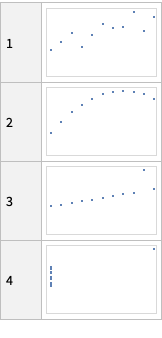

In [220]:
GroupBy[obj, #Set&, ListPlot[{#X,#Y}& /@ #]&]

------

## References

### Articles

[AA1] Anton Antonov, ["Introduction to data wrangling with Raku"](https://rakuforprediction.wordpress.com/2021/12/31/introduction-to-data-wrangling-with-raku/) , (2021), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[AA2] Anton Antonov, ["Увод в обработката на данни с Raku"](https://rakuforprediction.wordpress.com/2022/05/24/увод-в-обработката-на-данни-с-raku/), (2022), [RakuForPrediction at WordPress](https://rakuforprediction.wordpress.com).

[HW1] Hadley Wickham, ["The Split-Apply-Combine Strategy for Data Analysis"](https://www.jstatsoft.org/article/view/v040i01), (2011), [Journal of Statistical Software](https://www.jstatsoft.org/).

### Functions

[AAf1] Anton Antonov, ["ExampleDataset"](https://resources.wolframcloud.com/FunctionRepository/resources/ExampleDataset), (2020), [Wolfram Function Repository](https://resources.wolframcloud.com/FunctionRepository).

[AAf2] Anton Antonov, ["RecordsSummary"](https://resources.wolframcloud.com/FunctionRepository/resources/RecordsSummary), (2020), [Wolfram Function Repository](https://resources.wolframcloud.com/FunctionRepository).

### Packages

[AAp1] Anton Antonov, [DSL::English::DataQueryWorkflows Raku package](https://github.com/antononcube/Raku-DSL-English-DataQueryWorkflows), (2020-2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov, [DSL::Bulgarian Raku package](https://github.com/antononcube/Raku-DSL-Bulgarian), (2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov, [DSL::Shared::Utilities::ComprehensiveTranslations Raku package](https://github.com/antononcube/Raku-Text-Plot), (2020-2022), [GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov, [Example Datasets, Python package](https://pypi.org/project/ExampleDatasets/), (2021-2022), [PyPI.org](https://pypi.org).

### Videos

[AAv1] Anton Antonov, ["Multi-language Data-Wrangling Conversational Agent"](https://www.youtube.com/watch?v=pQk5jwoMSxs), (2020), [Wolfram Technology Conference 2020, YouTube/Wolfram](https://www.youtube.com/channel/UCJekgf6k62CQHdENWf2NgAQ).
